**Part Two**

# Learning Objective:
Finding the DNA pattern that plays a role in the molecular clock.

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

___

# Research Question:
**1-  Which DNA Pattern play the role of molecular clocks?(Part Two)** 


- [1.1 Motif Finding Meets Oliver Cromwell](#1-1-motif-finding-meets-oliver-cromwell)
- [1.2 Randomized Motif Search](#1-2-randomized-motif-search)
- [1.3 How Can a Randomized Algorithm Perform So Well?](#1-3-how-can-a-randomized-algorithm-perform-so-well)
- [1.4 Gibbs Sampling](#1-4-gibbs-sampling)
- [1.5 Detour: Complications in Motif Finding](#1-5-detour-complications-in-motif-finding)


___

##  1.1 Motif Finding Meets Oliver Cromwell

**What is the probability that the sun will not rise tomorrow?**

In 1650, during the English Civil War, Oliver Cromwell urged the Church of Scotland to reconsider supporting Charles II by saying:

**"I beseech you, in the bowels of Christ, think it possible that you may be mistaken."**

The Scots ignored him, and Cromwell invaded Scotland. This quote inspired Cromwell’s rule in statistics: never assign a probability of exactly 0 or 1 unless something is logically impossible or certain. Even very unlikely events (like “aliens wrote this book” or “the sun won’t rise tomorrow”) should have a small, nonzero probability.

In the 18th century, Laplace estimated the chance of the sun not rising tomorrow as 1 in 1,826,251, based on past sunrises over 5000 years. Though mocked at the time, this idea is now important in statistics.

In short: Don’t assume something is impossible just because it hasn’t happened in your data. Adjust probabilities for rare events to avoid misleading results.

**Laplace’s Rule of Succession**

Cromwell’s rule is relevant to the calculation of the probability of a string based on a profile matrix. For example, consider the following Profile

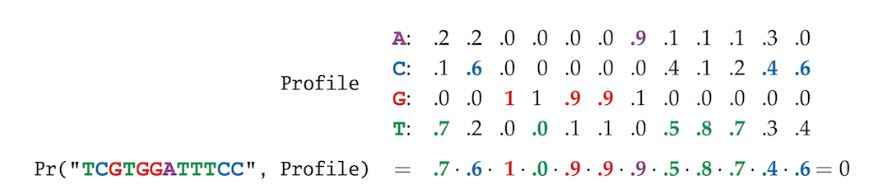

The fourth symbol of "TCGTGGATTTCC" causes Pr("TCGTGGATTTCC", Profile) to be equal to zero. As a result, the entire string is assigned a zero probability, even though "TCGTGGATTTCC" differs from the consensus string at only one position. For that matter, "TCGTGGATTTCC" has the same low probability as "AAATCTTGGAA", which differs from the consensus string at every position.

In order to improve this unfair scoring, bioinformaticians often substitute zeroes with small numbers called pseudocounts. The simplest approach to introducing pseudocounts, called Laplace’s Rule of Succession, is similar to the principle that Laplace used to calculate the probability that the sun will not rise tomorrow. In the case of motifs, pseudocounts often amount to adding 1 (or some other small number) to each element of Count(Motifs). For example, say that we have the following motif, count, and profile matrices:

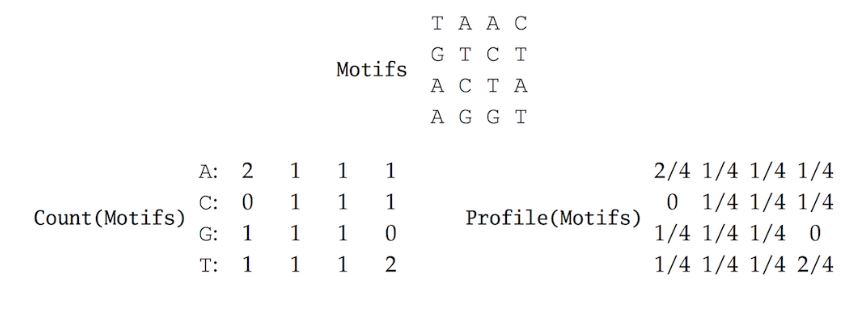

Laplace’s Rule of Succession adds 1 to each element of Count(Motifs), updating the two matrices to the following:

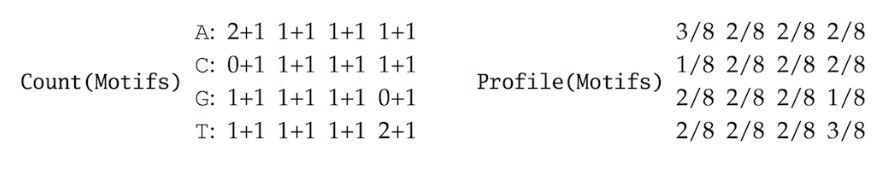

In [3]:
#lets write function for it
def CountWithPseudocounts(Motifs):
    t = len(Motifs)
    k = len(Motifs[0])
    counts = {"A": [1] * k, "C": [1] * k, "G": [1] * k, "T": [1] * k}
    for i in range(t):
        for motif in Motifs:
            counts[motif[i]][i] += 1
    return counts



#lets check the function
Motifs = ["AACGTA",
"CCCGTT",
"CACCTT",
"GGATTA",
"TTCCGG"]

CountWithPseudocounts(Motifs)

{'A': [2, 3, 2, 1, 1, 1],
 'C': [3, 2, 5, 3, 1, 1],
 'G': [2, 2, 1, 3, 2, 1],
 'T': [2, 2, 1, 2, 5, 1]}

In [6]:
def ProfileWithPseudocounts(Motifs):
    t = len(Motifs)
    k = len(Motifs[0])
    count = CountWithPseudocounts(Motifs)
    profile = {}
    for symbol in "ACGT":
        profile[symbol] = [count[symbol][i] / (t + 4) for i in range(k)]
    return profile


#lets check the function
Motifs = ["AACGTA",
"CCCGTT",
"CACCTT",
"GGATTA",
"TTCCGG"]

ProfileWithPseudocounts(Motifs)


{'A': [0.2222222222222222,
  0.3333333333333333,
  0.2222222222222222,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111],
 'C': [0.3333333333333333,
  0.2222222222222222,
  0.5555555555555556,
  0.3333333333333333,
  0.1111111111111111,
  0.1111111111111111],
 'G': [0.2222222222222222,
  0.2222222222222222,
  0.1111111111111111,
  0.3333333333333333,
  0.2222222222222222,
  0.1111111111111111],
 'T': [0.2222222222222222,
  0.2222222222222222,
  0.1111111111111111,
  0.2222222222222222,
  0.5555555555555556,
  0.1111111111111111]}






<span style="background-color: orange; color: black;">**How would you use Laplace’s Rule of Succession to address the shortcomings of GreedyMotifSearch()?**</span>

I would incorporate pseudocounts when calculating motif probabilities. By adding pseudocounts, the algorithm becomes more flexible and less prone to getting stuck in local optima, leading to better motif discovery, especially in cases with limited data

**An improved greedy motif search**

We now will apply Laplace’s Rule of Succession to search for the (4, 1)-motif "ACGT" implanted in the following strings Dna:

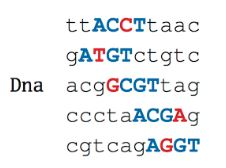

Again, let’s assume that the algorithm has already chosen the implanted 4-mer "ACCT" from the first string. We can construct the corresponding count and profile matrices using Laplace’s Rule of Succession:

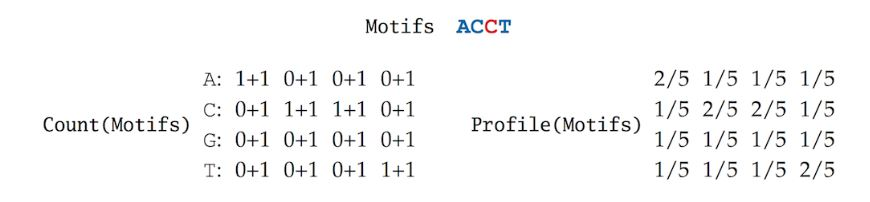

We use this profile matrix to compute the probabilities of all 4-mers in the second string from Dna:

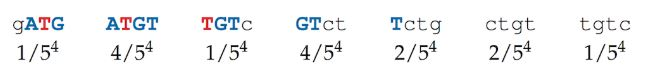

There are two profile-most probable 4-mers in the second string ("ATGT" and "GTct"); let’s assume that we get lucky again and choose the implanted 4-mer "ATGT". We now have the following motif, count, and profile matrices:

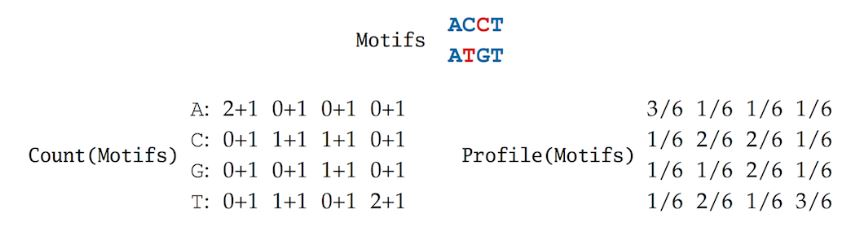

We use this profile matrix to compute the probabilities of all 4-mers in the third string from Dna:

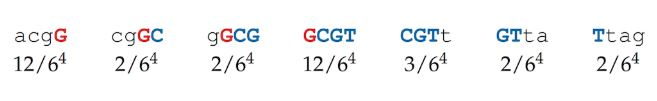

<span style="background-color: orange; color: black;">**why do we divide by 6 if there are only two k-mers of two strings?**</span>


we are dividing by 6 as we have 2 motifs (kmers) in the 2nd string, so each column would count the 2 nucleotides : 1 from each kmer so in this case we have ACCT and ATGT so A : 2 in the first position , then we have our 4 psuedocounts so +1 for each nucleotide  so 2 + 4 = 6. then we convert these to fractions to show out probability.
in the previous cell the denominator was 5 as we only had 1 kmer.

Again, there are two Profile-most probable 4-mers in the second string ("acgG" and "GCGT"). This time, we will assume that "acgG" is selected instead of the implanted 4-mer "GCGT". We now have the following motif, count, and profile matrices:

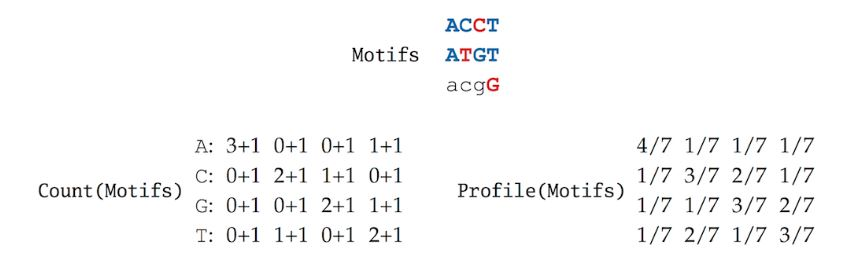

We use this profile matrix to compute probabilities of all 4-mers in the fourth string from Dna:


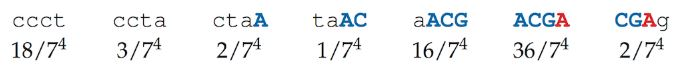

Despite the fact that we missed the implanted 4-mer in the third string, we have now found the implanted 4-mer in the fourth string in Dna as the profile-most probable 4-mer "ACGA"

This provides us with the following motif, count, and profile matrices: 

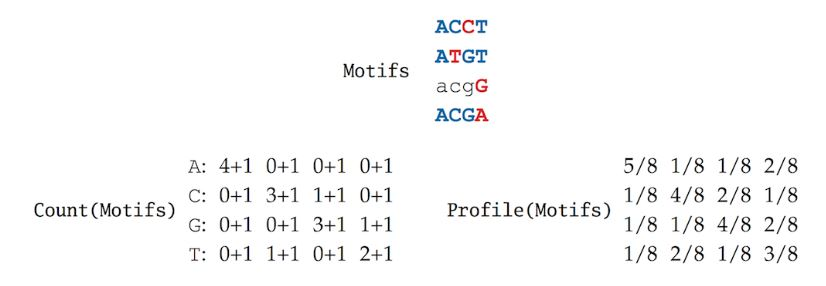

We now use this profile to compute the probabilities of all 4-mers in the fifth string in Dna:

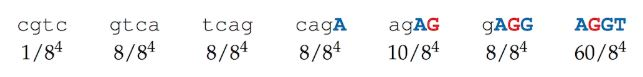

The profile-most probable 4-mer of the fifth string in Dna is "AGGT", the implanted 4-mer. As a result, GreedyMotifSearch() has produced the following motif matrix, which implies the correct consensus string "ACGT":


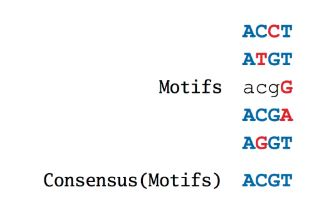

In [16]:
def GreedyMotifSearchWithPseudocounts(Dna, k, t):
    n = len(Dna[0])
    BestMotifs = [Dna[i][0:k] for i in range(t)] # output variable
    # your code here
    for i in range(n - k + 1):
        motifs = [Dna[0][i:i + k]]
        for j in range(1, t):
            profile = ProfileWithPseudocounts(motifs[0:j])
            motifs.append(ProfileMostProbableKmer(Dna[j], k, profile))
        if Score(motifs) < Score(BestMotifs):
            BestMotifs = motifs
    return BestMotifs


def Consensus(Motifs):
    # insert your code here
    k = len(Motifs[0])
    count = CountWithPseudocounts(Motifs)
    consensus = ""
    for j in range(k):
        m = 0
        frequentSymbol = ""
        for symbol in "ACGT":
            if count[symbol][j] > m:
                m = count[symbol][j]
                frequentSymbol = symbol
        consensus += frequentSymbol
    return consensus

def Score(Motifs):
    # Insert code here
    consensus = Consensus(Motifs)  # Get the consensus string using Consensus function
    k = len(consensus)
    t = len(Motifs)
    score = 0
    for j in range(k):
        for i in range(t):
            if Motifs[i][j] != consensus[j]:
                score += 1
    return score


def Pr(Text, Profile):
    # insert your code here
    p = 1.0
    for i in range(len(Text)):
        symbol = Text[i]
        column = i 
        p *= Profile[symbol][column]
    return p

def ProfileMostProbableKmer(Text, k, Profile):
    max_prob = -1.0
    most_prob_kmer = ""
    for i in range(len(Text) - k + 1):
        kmer = Text[i:i+k]
        probability = Pr(kmer, Profile)
        if probability > max_prob:
            max_prob = probability
            most_prob_kmer = kmer
    return most_prob_kmer

def ProfileWithPseudocounts(Motifs):
    t = len(Motifs)
    k = len(Motifs[0])
    count = CountWithPseudocounts(Motifs)
    profile = {} # output variable
    # your code here
    for symbol in "ACGT":
        profile[symbol] = [count[symbol][i] / (t + 4) for i in range(k)]
    return profile


def CountWithPseudocounts(Motifs):
    t = len(Motifs)
    k = len(Motifs[0])
    # insert your code here
    counts = {'A': [1] * k, 'C': [1] * k, 'G': [1] * k, 'T': [1] * k}
    for i in range(k):
        for motif in Motifs:
            counts[motif[i]][i] += 1
    return counts

In [18]:
Dna = ["GCGCCCCGCCCGGACAGCCATGCGCTAACCCTGGCTTCGATGGCGCCGGCTCAGTTAGGGCCGGAAGTCCCCAATGTGGCAGACCTTTCGCCCCTGGCGGACGAATGACCCCAGTGGCCGGGACTTCAGGCCCTATCGGAGGGCTCCGGCGCGGTGGTCGGATTTGTCTGTGGAGGTTACACCCCAATCGCAAGGATGCATTATGACCAGCGAGCTGAGCCTGGTCGCCACTGGAAAGGGGAGCAACATC",
       "CCGATCGGCATCACTATCGGTCCTGCGGCCGCCCATAGCGCTATATCCGGCTGGTGAAATCAATTGACAACCTTCGACTTTGAGGTGGCCTACGGCGAGGACAAGCCAGGCAAGCCAGCTGCCTCAACGCGCGCCAGTACGGGTCCATCGACCCGCGGCCCACGGGTCAAACGACCCTAGTGTTCGCTACGACGTGGTCGTACCTTCGGCAGCAGATCAGCAATAGCACCCCGACTCGAGGAGGATCCCG",
       "ACCGTCGATGTGCCCGGTCGCGCCGCGTCCACCTCGGTCATCGACCCCACGATGAGGACGCCATCGGCCGCGACCAAGCCCCGTGAAACTCTGACGGCGTGCTGGCCGGGCTGCGGCACCTGATCACCTTAGGGCACTTGGGCCACCACAACGGGCCGCCGGTCTCGACAGTGGCCACCACCACACAGGTGACTTCCGGCGGGACGTAAGTCCCTAACGCGTCGTTCCGCACGCGGTTAGCTTTGCTGCC",
       "GGGTCAGGTATATTTATCGCACACTTGGGCACATGACACACAAGCGCCAGAATCCCGGACCGAACCGAGCACCGTGGGTGGGCAGCCTCCATACAGCGATGACCTGATCGATCATCGGCCAGGGCGCCGGGCTTCCAACCGTGGCCGTCTCAGTACCCAGCCTCATTGACCCTTCGACGCATCCACTGCGCGTAAGTCGGCTCAACCCTTTCAAACCGCTGGATTACCGACCGCAGAAAGGGGGCAGGAC",
       "GTAGGTCAAACCGGGTGTACATACCCGCTCAATCGCCCAGCACTTCGGGCAGATCACCGGGTTTCCCCGGTATCACCAATACTGCCACCAAACACAGCAGGCGGGAAGGGGCGAAAGTCCCTTATCCGACAATAAAACTTCGCTTGTTCGACGCCCGGTTCACCCGATATGCACGGCGCCCAGCCATTCGTGACCGACGTCCCCAGCCCCAAGGCCGAACGACCCTAGGAGCCACGAGCAATTCACAGCG",
       "CCGCTGGCGACGCTGTTCGCCGGCAGCGTGCGTGACGACTTCGAGCTGCCCGACTACACCTGGTGACCACCGCCGACGGGCACCTCTCCGCCAGGTAGGCACGGTTTGTCGCCGGCAATGTGACCTTTGGGCGCGGTCTTGAGGACCTTCGGCCCCACCCACGAGGCCGCCGCCGGCCGATCGTATGACGTGCAATGTACGCCATAGGGTGCGTGTTACGGCGATTACCTGAAGGCGGCGGTGGTCCGGA",
       "GGCCAACTGCACCGCGCTCTTGATGACATCGGTGGTCACCATGGTGTCCGGCATGATCAACCTCCGCTGTTCGATATCACCCCGATCTTTCTGAACGGCGGTTGGCAGACAACAGGGTCAATGGTCCCCAAGTGGATCACCGACGGGCGCGGACAAATGGCCCGCGCTTCGGGGACTTCTGTCCCTAGCCCTGGCCACGATGGGCTGGTCGGATCAAAGGCATCCGTTTCCATCGATTAGGAGGCATCAA",
       "GTACATGTCCAGAGCGAGCCTCAGCTTCTGCGCAGCGACGGAAACTGCCACACTCAAAGCCTACTGGGCGCACGTGTGGCAACGAGTCGATCCACACGAAATGCCGCCGTTGGGCCGCGGACTAGCCGAATTTTCCGGGTGGTGACACAGCCCACATTTGGCATGGGACTTTCGGCCCTGTCCGCGTCCGTGTCGGCCAGACAAGCTTTGGGCATTGGCCACAATCGGGCCACAATCGAAAGCCGAGCAG",
       "GGCAGCTGTCGGCAACTGTAAGCCATTTCTGGGACTTTGCTGTGAAAAGCTGGGCGATGGTTGTGGACCTGGACGAGCCACCCGTGCGATAGGTGAGATTCATTCTCGCCCTGACGGGTTGCGTCTGTCATCGGTCGATAAGGACTAACGGCCCTCAGGTGGGGACCAACGCCCCTGGGAGATAGCGGTCCCCGCCAGTAACGTACCGCTGAACCGACGGGATGTATCCGCCCCAGCGAAGGAGACGGCG",
       "TCAGCACCATGACCGCCTGGCCACCAATCGCCCGTAACAAGCGGGACGTCCGCGACGACGCGTGCGCTAGCGCCGTGGCGGTGACAACGACCAGATATGGTCCGAGCACGCGGGCGAACCTCGTGTTCTGGCCTCGGCCAGTTGTGTAGAGCTCATCGCTGTCATCGAGCGATATCCGACCACTGATCCAAGTCGGGGGCTCTGGGGACCGAAGTCCCCGGGCTCGGAGCTATCGGACCTCACGATCACC"]

# set t equal to the number of strings in Dna and k equal to 15
t = len(Dna)
k = 15

# Call GreedyMotifSearchWithPseudocounts(Dna, k, t) and store the output in a variable called Motifs
Motifs = GreedyMotifSearchWithPseudocounts(Dna, k, t)
# Print the Motifs variable
print(Motifs)
# Print Score(Motifs)
print(Score(Motifs))

['GGACTTCAGGCCCTA', 'GGTCAAACGACCCTA', 'GGACGTAAGTCCCTA', 'GGATTACCGACCGCA', 'GGCCGAACGACCCTA', 'GGACCTTCGGCCCCA', 'GGACTTCTGTCCCTA', 'GGACTTTCGGCCCTG', 'GGACTAACGGCCCTC', 'GGACCGAAGTCCCCG']
35


we have now seen the power of pseudocounts illustrated on a small example. Running GreedyMotifSearchWithPseudocounts() to solve the Subtle Motif Problem returns a collection of 15-mers Motifs with Score(Motifs) equal to 35  and Consensus(Motifs) equal to "AAAAAtAgaGGGGtt". Thus, Laplace’s Rule of Succession has provided a significant improvement over the original GreedyMotifSearch(), which returned the consensus string "gttAAAtAgaGatGtG" with Score(Motifs) equal to 58.

You may be satisfied with the performance of GreedyMotifSearch(), but you should know by now that your biologist are never satisfied. Can we design an even more accurate motif finding algorithm?

___

##  1.2 Randomized Motif Search

**Rolling dice to find motifs**

We will now turn to randomized algorithms that flip coins and roll dice in order to search for motifs. Making random algorithmic decisions may sound like a disastrous idea — just imagine a chess game in which every move would be decided by rolling a die. However, an 18th Century French mathematician and naturalist, Comte de Buffon, first proved that randomized algorithms are useful by randomly dropping needles onto parallel strips of wood and using the results of this experiment to accurately approximate the constant π.

In 1733, Comte de Buffon wrote an essay on a Medieval French game called “Le jeu de franc carreau”. In this game, a single player flips a coin into the air, and the coin lands on a checkerboard.

The player wins if the coin lands completely within one of the squares on the board, and loses otherwise (figure below (top)). Buffon asked a natural question: what is the probability that the player wins?


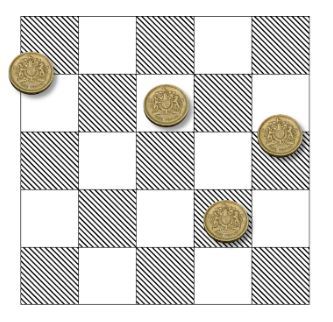

Let’s assume that the checkerboard consists of just a single square with side length 1, that the coin has radius r < 1/2, and that the center of the coin always lands within the square. Then the player can only win if the center of the circle falls within an imaginary central square of side length 1 - 2r (figure below). Assuming that the coin lands anywhere on the larger square with uniform probability, then the probability that the coin falls completely within the smaller square is given by the ratio of the areas of the two squares, or (1 - 2r)2.


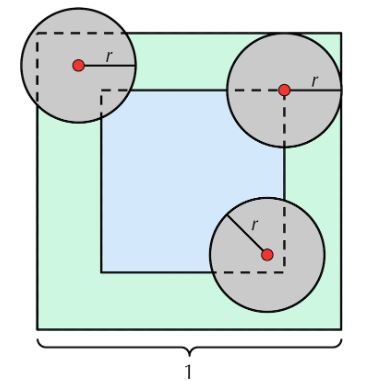

Four decades later, Buffon published a paper describing a similar game in which the player uniformly drops a needle onto a floor covered by long wooden panels of equal width. In this game, which has become known as Buffon’s needle, the player wins if the needle falls entirely within one of the panels. Note that computing the probability of a win is now complicated by the fact that the needle is described by an orientation in addition to its position. Nevertheless, the first game gives us an idea for how to solve this problem: once we fix a position for the center of the needle, its collection of different possible orientations sweep out a circle (figure below).

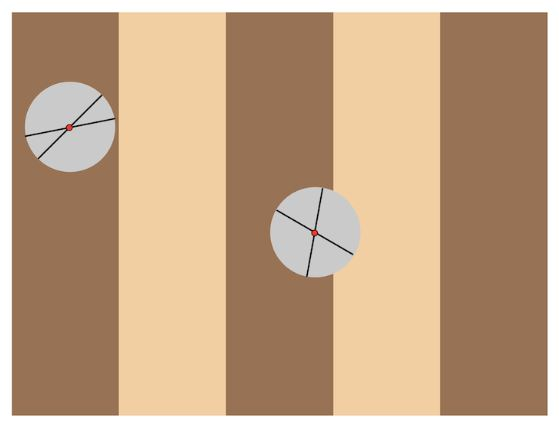

The probability that the player wins depends on the length of the needle with respect to the distance between wooden panels. We will assume that both of these lengths are equal to 2, and we will find the probability of a loss instead of a win. Buffon used calculus to show that Pr(loss) must be equal to 2/π.

But what does Buffon’s needle have to do with randomized algorithms? In 1812, none other than Laplace pointed out that Buffon’s needle could be used to approximate π, and the world’s first randomized algorithm was born. Specifically, we can approximate the probability Pe of a loss empirically by dully flipping a needle into the air thousands of times (or asking a computer to do it for us). Once we have computed this empirical probability, we can conclude that Pe is approximately equal to 2/π, and thus

π ≈ 2 / Pe .

Randomized algorithms may be nonintuitive because they lack the control of traditional algorithms. Most randomized algorithms, including the motif finding algorithms that we will consider in this chapter, are Monte Carlo algorithms. These algorithms are not guaranteed to return exact solutions, but they do quickly find approximate solutions. Because of their speed, they can be run many times, allowing us to choose the best approximation from thousands of runs.

The question remains, though, how we can build such an algorithm for motif finding

**Rolling dice to find motifs**

We previously defined Profile(Motifs) as the profile matrix constructed from a collection of k-mers Motifs in Dna. Now, given a collection of strings Dna and an arbitrary 4 x k matrix Profile, we define Motifs(Profile, Dna) as the collection of k-mers formed by the profile-most probable k-mers in each string from Dna, using Profile. For example, consider the following Profile and Dna: 

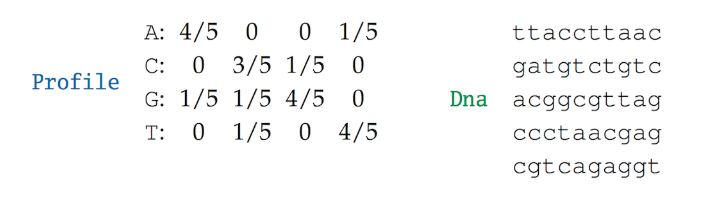

Taking the profile-most probable 4-mer from each row of Dna produces the following 4-mers (shown in red):

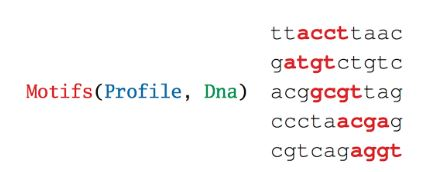

In [20]:
#same functions that we created above 

def Pr(Text, Profile):
    p = 1.0
    n = len(Text)
    for i in range(n):
        symbol = Text[i]
        column = i
        p *= Profile[symbol][column]
    return p


def ProfileMostProbablePattern(Text, k, Profile):
    max_prob = -1.0
    most_prob_kmer = ""
    n = len(Text)
    for i in range(n - k + 1):
        kmer = Text[i:i+k]
        probability = Pr(kmer, Profile)
        if probability > max_prob:
            max_prob = probability
            most_prob_kmer = kmer
    return most_prob_kmer

In [22]:
#define the function
def Motifs(Profile, Dna):
    k = len(Profile['A'])
    most_prob_kmer = []
    for Text in Dna:
        most_prob = ProfileMostProbableKmer(Text, k, Profile)
        most_prob_kmer.append(most_prob)
    return most_prob_kmer


In general, we can begin from a collection of randomly chosen k-mers Motifs in Dna, construct Profile(Motifs), and use this profile to generate a new collection of k-mers:

  **Motifs(Profile(Motifs), Dna).**

Why would we do this? Because our hope is that Motifs(Profile(Motifs), Dna) has a better score than the original collection of k-mers Motifs. We can then form the profile matrix of these k-mers,

**Profile(Motifs(Profile(Motifs), Dna))**

and use it to form the most probable k-mers,

**Motifs(Profile(Motifs(Profile(Motifs), Dna)), Dna).**

We can continue to iterate. . .

**...Profile(Motifs(Profile(Motifs(Profile(Motifs), Dna)), Dna))...**

for as long as the score of the constructed motifs keeps improving, which is exactly what RandomizedMotifSearch() does. To implement this algorithm, we will need to randomly select the initial collection of k-mers that form the motif matrix Motifs. To do so, we will first need to implement a random number generator that is equally likely to return any integer between 1 and M. You might like to think about this random number generator as an unbiased M-sided die.

Simulating the process of generating a random integer is more difficult than you might think and requires more mathematics than we would like to describe here. Fortunately, since the task of generating random numbers arises in so many applications, Python provides a module called random for generating them. You can think of a module as a “bundle” of related functions. To use the random module, we place the following statement at the top of our file.

In [23]:
import random

Inside of the random module is a built-in function called randint(1, M) that generates a random integer between 1 and M, inclusively. To call this function, we use

**random.randint(1, M)**

In [25]:
def RandomMotifs(Dna, k, t):
    random_motifs = []
    l = len(Dna[0])
    for i in range(t):
        random_number = random.randint(0, l - k)
        random_motifs.append(Dna[i][random_number:random_number + k])
    return random_motifs


RandomMotifs(Dna, k, t)

['CCCTGGCTTCGATGG',
 'TGAGGTGGCCTACGG',
 'CTTGGGCCACCACAA',
 'GGTGGGCAGCCTCCA',
 'TGTACATACCCGCTC',
 'GCCCCACCCACGAGG',
 'CCCTAGCCCTGGCCA',
 'ACATGTCCAGAGCGA',
 'ACGTACCGCTGAACC',
 'TAACAAGCGGGACGT']

We are now ready to develop RandomizedMotifSearch(). We start by generating a collection of random motifs using the function from the previous step, which we set as the best-scoring collection of motifs.

M = RandomMotifs(Dna, k, t)
    BestMotifs = M



The code below stops running as soon as the score of the motifs that we generate stops improving. It uses the loop “while True”, which iterates until it encounters a return statement. It can be dangerous to use such a loop, since it could lead to an infinite loop in which a program never terminates. However, in this particular case, the motif score must eventually stop improving, so that RandomizedMotifSearch() must eventually terminate.


In [27]:
def RandomizedMotifSearch(Dna, k, t):
    m = RandomMotifs(Dna, k, t)
    BestMotifs = m
    while True:
        Profile = ProfileWithPseudocounts(m)
        m = Motifs(Profile, Dna)
        if Score(m) < Score(BestMotifs):
            BestMotifs = m
        else:
            return BestMotifs


RandomizedMotifSearch(Dna, k, t)

['CCCCGCCCGGACAGC',
 'CCCCGACTCGAGGAG',
 'CCGCGACCAAGCCCC',
 'CCGCAGAAAGGGGGC',
 'CAGCACTTCGGGCAG',
 'CCGCCGACGGGCACC',
 'CCGCGCTTCGGGGAC',
 'CCACAATCGGGCCAC',
 'CGGCCCTCAGGTGGG',
 'CCGGGCTCGGAGCTA']

**Why randomized motif search works**

At first glance, RandomizedMotifSearch() appears to be doomed. How can this algorithm, which starts from a random guess, possibly find anything useful? To explore RandomizedMotifSearch(), let’s run it on five short strings with the implanted (4, 1)-motif "ACGT" (shown in upper case letters below) and imagine that it chooses the following 4-mers Motifs (shown in red) at the first iteration. As expected, it misses the implanted motif in nearly every string.


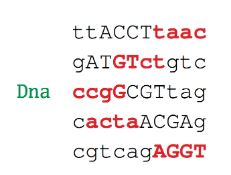

Below, we construct the profile matrix Profile(Motifs) of the chosen 4-mers.

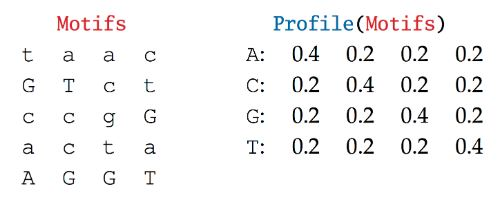

We can now compute the probabilities of every 4-mer in Dna based on this profile matrix. For example, the probability of the first 4-mer in the first string of Dna is Pr("ttAC", Profile) , which is equal to 0.2 · 0.2 · 0.2 · 0.2 = 0.0016. The maximum probabilities in every row are shown in red below

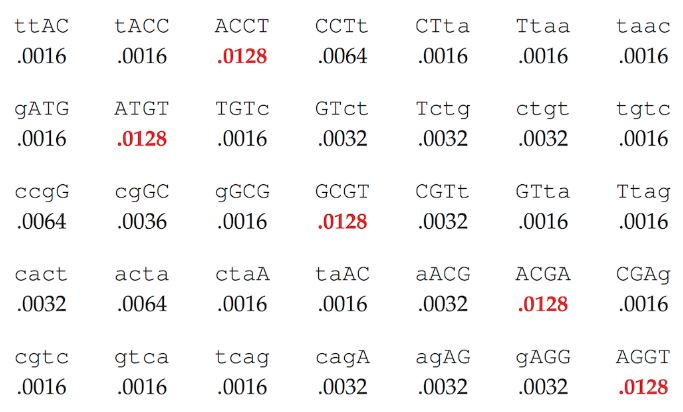

We select the most probable 4-mer in each row above as our new collection Motifs (shown below). Notice that this collection has captured all five implanted motifs in Dna!


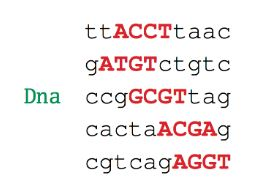




<span style="background-color: orange; color: black;">**How is it possible that randomly chosen k-mers have led us to the correct implanted k-mer?**</span>

- Randomly chosen kk-mers allow the algorithm to explore different regions of the solution space.

- While the initial choice may be poor, the iterative process of updating the profile and selecting more probable kk-mers helps the algorithm escape local optima and converge toward a better solution.

For the Subtle Motif Problem with implanted 15-mer "AAAAAAAAGGGGGGG", when we run RandomizedMotifSearch() with N equal to 100,000 (each time running the algorithm with new randomly selected k-mers), it returns the 15-mers shown in the figure below as the lowest scoring collection Motifs across all iterations, resulting in the consensus string "AAAAAAAAacaGGGG" with score 43. These strings are only slightly less conserved than the collection of implanted (15, 4)-motifs with score 40 (or the motif returned by GreedyMotifSearchWithPseudocounts(), which has score 41), and it largely captures the implanted motif. Furthermore, unlike GreedyMotifSearchWithPseudocounts(), RandomizedMotifSearch() can be run for a larger number of iterations to discover better and better motifs.


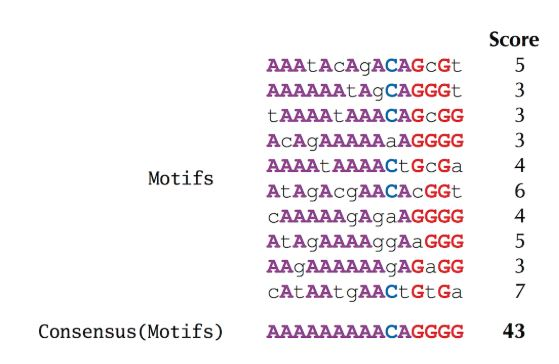

___

##  1.3 How Can a Randomized Algorithm Perform So Well?

In the previous section, we began with a collection of implanted motifs that resulted in the following profile matrix.

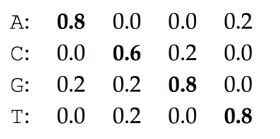

If the strings in Dna were truly random, then we would expect that all nucleotides in the selected k-mers would be equally likely, resulting in an expected Profile in which every entry is approximately 0.25:

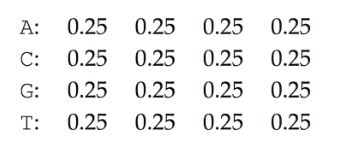

Such a uniform profile is essentially useless for motif finding because no string is more probable than any other according to this profile and because it does not provide any clues on what an implanted motif looks like.

At the opposite end of the spectrum, if we were incredibly lucky, we would choose the implanted k-mers Motifs from the very beginning, resulting in the first of the two profile matrices above. In practice, we are likely to obtain a profile matrix somewhere in between these two extremes, such as the following matrix that we obtained in the previous cell:

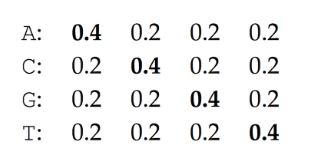

This profile matrix has already started to point us toward the implanted motif "ACGT", i.e., "ACGT" is the most likely 4-mer that can be generated by this profile. Fortunately, RandomizedMotifSearch() is designed so that subsequent steps have a good chance of leading us toward this implanted motif (although it is not certain).



If you still doubt the efficacy of randomized algorithms, consider the following argument. We have already noticed that if the strings in Dna were random, then RandomizedMotifSearch() would start from a nearly uniform profile, and there would be nothing to work with. However, the key observation is that the strings in Dna are not random because they include the implanted motif! These multiple occurrences of the same motif may direct the profile matrix away from the uniform profile and toward the implanted motif. For example, consider again the original randomly selected k-mers Motifs (shown in red):


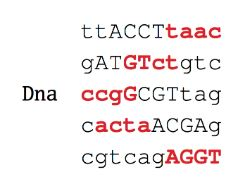

we will see that the 4-mer "AGGT" in the last string happened to capture the implanted motif simply by chance. In fact, the profile formed from the remaining 4-mers ("taac", "GTct", "ccgG", and "acta") is uniform. Note that only completely captured motifs (like "AGGT") rather than partially captured motifs (like "GTct" or "ccgG") contribute to the statistical bias in the profile matrix.

we will see that the 4-mer "AGGT" in the last string happened to capture the implanted motif simply by chance. In fact, the profile formed from the remaining 4-mers ("taac", "GTct", "ccgG", and "acta") is uniform.

Unfortunately, capturing a single implanted motif is often insufficient to steer RandomizedMotifSearch() to an optimal solution. Therefore, since the number of starting positions of k-mers is huge, the strategy of randomly selecting motifs is often not as successful as in the simple example above. The chance that these randomly selected k-mers will be able to guide us to the optimal solution is relatively small.

___

##  1.4 Gibbs Sampling

Note that RandomizedMotifSearch() may change all t strings in Motifs in a single iteration. This strategy may prove reckless, since some correct motifs (captured in Motifs) may potentially be discarded at the next iteration. GibbsSampler() is a more cautious iterative algorithm that discards a single k-mer from the current set of motifs at each iteration and decides to either keep it or replace it with a new one. This algorithm thus moves with more caution in the space of all motifs, as illustrated below.


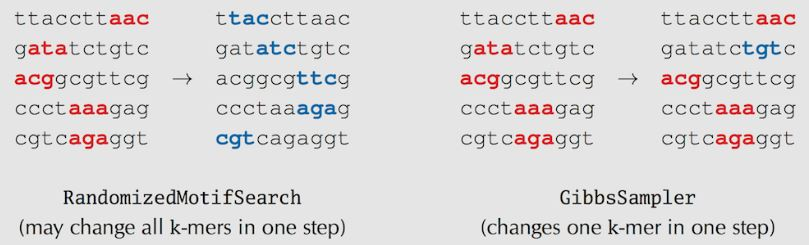

Like RandomizedMotifSearch(), GibbsSampler() starts with randomly chosen k-mers in each of t DNA strings, but it makes a random choice at each iteration. It uses a list of t randomly selected k-mers Motifs to come up with another (hopefully better scoring) set of k-mers. In contrast with RandomizedMotifSearch(), which defines new motifs as 

**Motifs(Profile(Motifs), Dna)**

GibbsSampler() randomly selects an integer i between 0 and t - 1 and then randomly changes a single k-mer Motif[i]. That is, GibbsSampler() makes two random choices at each iteration. It uses random.randint(0, t-1) for the first choice (since all t strings in Dna are equally likely), but it does not make sense to use random.randint() to choose a k-mer from Motif[i] because some k-mers are more likely than others. Indeed, each k-mer Pattern in Motif[i] may have a different probability Pr(Pattern, Profile) that it was generated by Profile.

We will illustrate how GibbsSampler() works on the same strings Dna that we considered before. Imagine that, at the initial step, the algorithm has chosen the following 4-mers (shown in red) and has randomly selected the third string for removal. To be more precise, GibbsSampler() does not really remove the third string; it ignores it at this particular step and may analyze it again in subsequent step

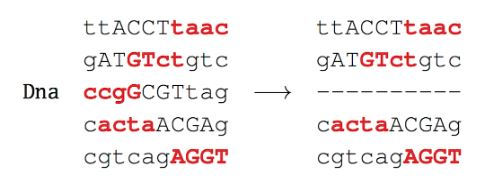

This results in the following motif, count, and profile matrices.

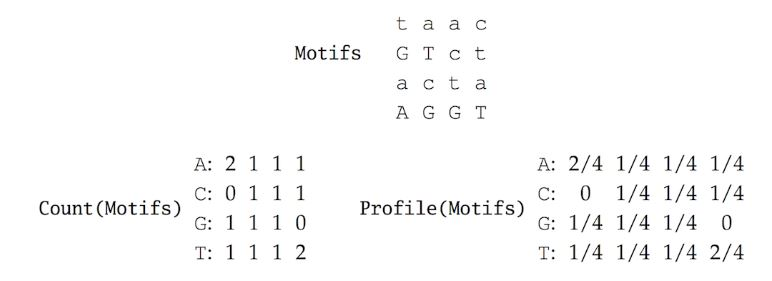

Note that the profile matrix deviates only slightly from the uniform profile, making us wonder whether we have any chance to be steered toward the implanted motif. We now use this profile matrix to compute the probabilities of all 4-mers in the deleted string "ccgGCGTtag":


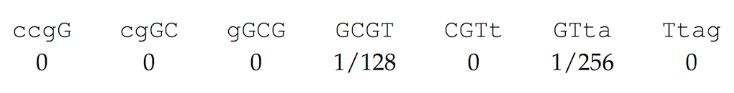

Note that all but two of these probabilities are zero. This situation is similar to the one we encountered with GreedyMotifSearch(), and as before, we need to augment zero probabilities with small pseudocounts to avoid disastrous results.

Application of Laplace’s Rule of Succession to the count matrix above yields the following updated count and profile matrices:

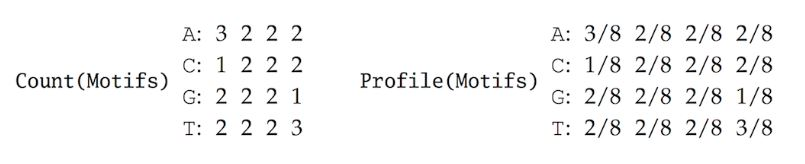

After adding pseudocounts, the 4-mer probabilities in the deleted string "ccgGCGTtag" are recomputed as follows:

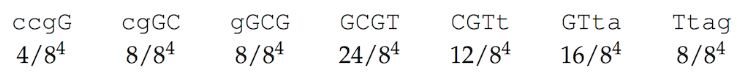

The question is how to model a biased seven-sided die in which the probability of rolling the i-th side of the die corresponds to the probability of the i-th 4-mer above. We would first like to rescale these numbers so that they sum to 1, as shown below.

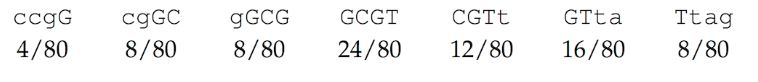

To rescale a collection of probabilities (the sides of the die) so that these probabilities sum to 1, we will write a function called Normalize(Probabilities). This function takes a dictionary Probabilities whose keys are k-mers and whose values are the probabilities of these k-mers (which do not necessarily sum to 1). The function should divide each value in Probabilities by the sum of all values in  Probabilities, then return the resulting dictionary.



In [29]:
def Normalize(Probabilities):
    """
    Input: A dictionary Probabilities, where keys are k-mers and values are the probabilities of these k-mers (which do not necessarily sum up to 1)
    Output: A normalized dictionary where the probability of each k-mer was divided by the sum of all k-mers' probabilities
    """

    total = sum(Probabilities.values())
    norm_prob = {key: value / total for key, value in Probabilities.items()}
    return norm_prob


#lets test
Probabilities = {'A': 0.1, 'C': 0.1, 'G': 0.1, 'T': 0.1}
Normalize(Probabilities)

{'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}

We now need to simulate rolling a die so that "ccgG" has probability 4/80, "cgGC" has probability 8/80, and so on. We will do so by generating a random number p between 0 and 1. If p is between 0 and 4/80, then it corresponds to "ccgG". If p is between 4/80 and 4/80 + 8/80, then it corresponds to "cgGC", etc.

How can we generate a random number between 0 and 1? In addition to the randint function, Python’s random module also includes a function called uniform(a, b) that generates a random floating point number (i.e., a decimal) between a and b. We can therefore generate our desired random number p by calling random.uniform(0, 1).

In [31]:
def WeightedDie(Probabilities):
    """
    Input:  A dictionary Probabilities whose keys are k-mers and whose values are the probabilities of these kmers
    Output: A randomly chosen k-mer with respect to the values in Probabilities
    """

    kmer = ''
    p = random.uniform(0, 1)
    cumulative = 0.0
    for kmer, prob in Probabilities.items():
        cumulative += prob
        if p < cumulative:
            break
    return kmer


#lets test
Probabilities = {'A': 0.1, 'C': 0.1, 'G': 0.1, 'T': 0.1}
WeightedDie(Probabilities)


'T'

Assemble this code into a function ProfileGeneratedString(Text, profile, k) that takes as input a string Text, a profile matrix profile , and an integer k .  It should then return a randomly generated k-mer from Text whose probabilities are generated from profile, as described above.



In [34]:
def ProfileGeneratedString(Text, profile, k):
    """
    Input: A string Text, a profile matrix Profile, and an integer k
    Output: ProfileGeneratedString(Text, profile, k)
    """
    n = len(Text)
    probabilities = {}
    for i in range(0, n- k + 1):
        kmer = Text[i:i+k]
        probabilities[kmer] = Pr(kmer, profile)
    probabilities = Normalize(probabilities)
    return WeightedDie(probabilities)


Text = "AAACCCAAACCC"
profile = {'A': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'C': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'G': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'T': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}
k = 2
ProfileGeneratedString(Text, profile, k)

'CC'

Let’s assume that after “rolling the seven-sided die” represented by the function Die(Probabilities), we arrive at the profile-randomly generated 4-mer "GCGT" (the fourth 4-mer in the deleted string). The deleted string "ccgGCGTtag" is now added back to the collection of motifs, and "GCGT" substitutes the previously chosen "ccgG" in the third string in Dna, as shown below. We then roll a (fair) five-sided die and randomly select the first string from Dna for removal.

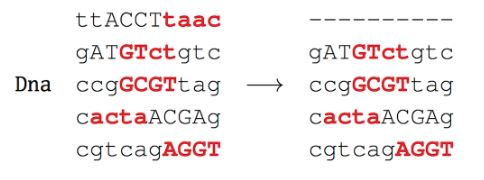

After constructing the motif and profile matrices, we obtain the following:

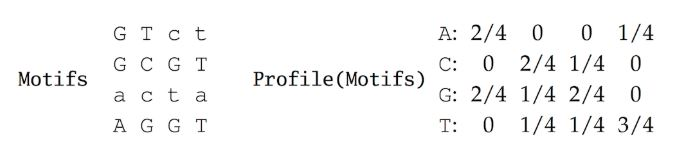

Note that the profile matrix looks more biased toward the implanted motif than the previous profile matrix did.

We update the count and profile matrices with pseudocounts:

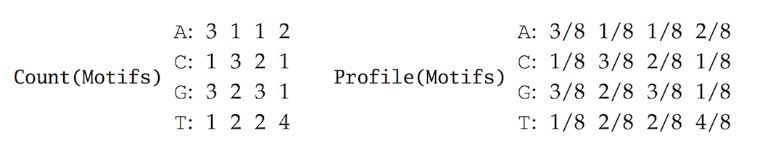

Then, we compute the probabilities of all 4-mers in the deleted string "ttACCTtaac":

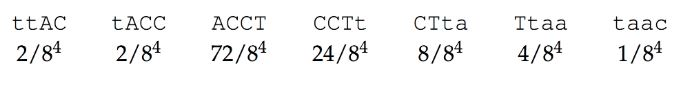

When we rescale these numbers so that they sum to 1 and roll a seven-sided die based on the results, we arrive at the profile-randomly generated k-mer "ACCT", which we add to the collection Motifs

After rolling the five-sided die once again, we randomly select the fourth string for removal.

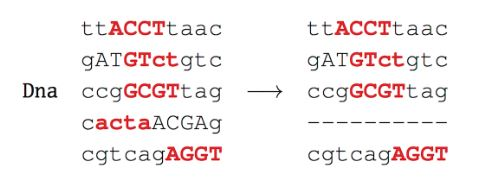

We further add pseudocounts and construct the resulting count and profile matrices:

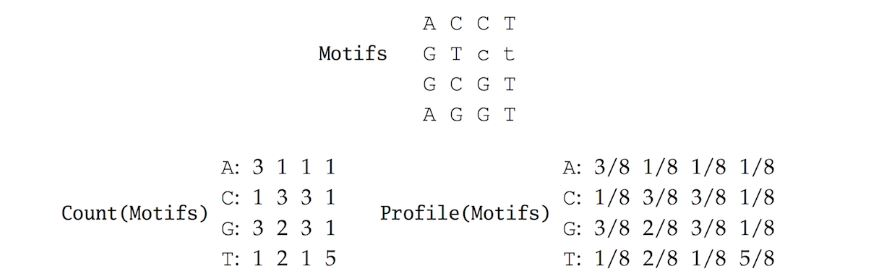

We now compute the probabilities of all 4-mers in the deleted string "cactaACGAg":

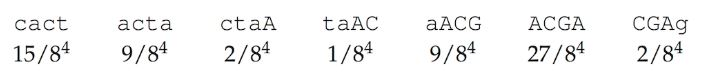

We need to roll a seven-sided die to produce a profile-randomly generated 4-mer. Assuming the most probable scenario in which we select "ACGA", we update the selected 4-mers as follows:

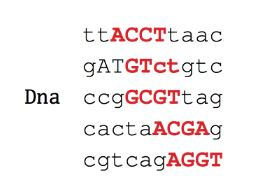

You can see that the algorithm is beginning to converge. Rest assured that a subsequent iteration will produce all implanted motifs after we select the second string in Dna (when the incorrect 4-mer "GTct" will likely change into the implanted (4, 1)-motif "ACGT").




<span style="background-color: orange; color: black;">**Note that in contrast to RandomizedMotifSearch(), which always moves from higher to lower scoring Motifs, GibbsSampler() may move from lower to higher scoring Motifs. Does this make sense?**</span>



Allowing transitions to higher scoring motifs ensures that the algorithm doesn't get stuck in one area of the solution space prematurely.

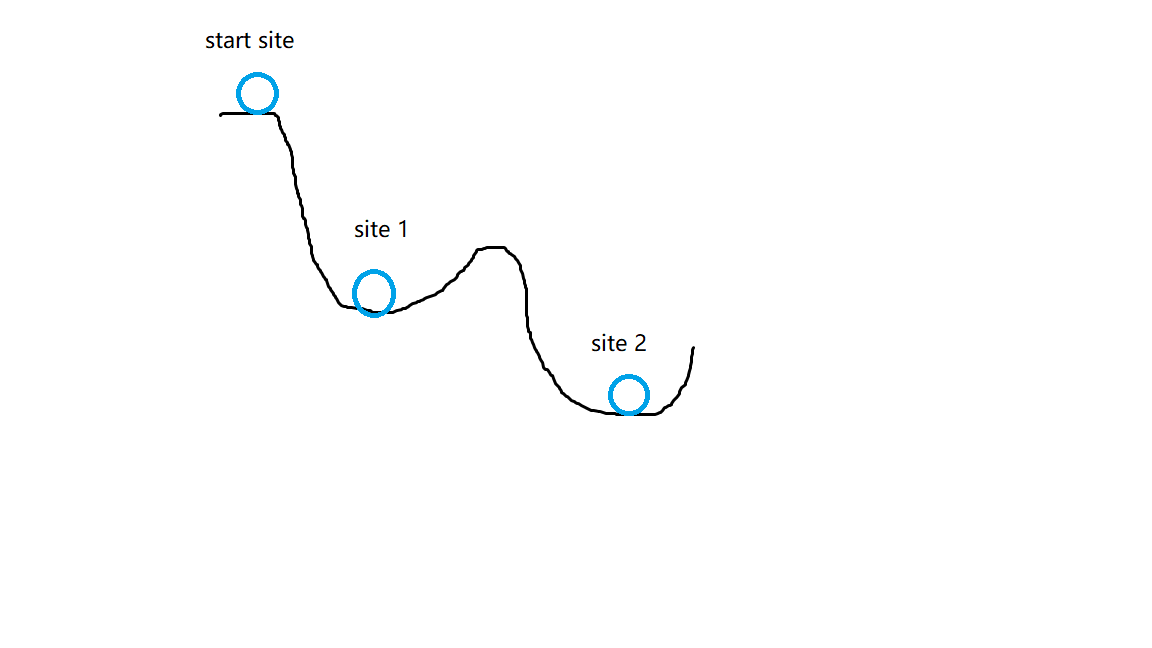

Although GibbsSampler() performs well in many cases, it may converge to a suboptimal solution, particularly for difficult search problems with elusive motifs. A local optimum is a solution that is optimal within a small neighboring set of solutions, which is in contrast to a global optimum, or the optimal solution among all possible solutions. Since GibbsSampler() explores just a small subset of solutions, it may “get stuck” in a local optimum. For this reason, similarly to RandomizedMotifSearch(), it should be run many times with the hope that one of these runs will produce the best-scoring motifs

Now that we have seen how GibbsSampler() works, implement it in Python

function should take a parameter N corresponding to the number of iterations that we plan to run the program

In [36]:
def GibbsSampler(Dna, k, t, N):
    Motifs=RandomMotifs(Dna, k, t)
    BestMotifs=Motifs
    for j in range(N):
        i=random.randint(1,t)
        text=Motifs.pop(i-1)
        profile=ProfileWithPseudocounts(Motifs)
        kmer=ProfileMostProbableKmer(text, k, profile)
        Motifs.insert(i-1,kmer)
        if Score(Motifs)<Score(BestMotifs):
            BestMotifs=Motifs
    return BestMotifs


Dna = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
"GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
"TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
"TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
"AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]
k = 8
t = 5
N = 100
GibbsSampler(Dna, k, t, N)

['AACGGCCA', 'AGTGCCAA', 'ATACAGGC', 'CGTCGGTG', 'CACGTGCA']

**Searching for the DosR motif**

What k-mer size should we choose in order to analyze the DosR dataset using GibbsSampler()? Taking a wild guess and running RandomizedMotifSearch() for varying values of k returns the consensus strings shown in the figure below.

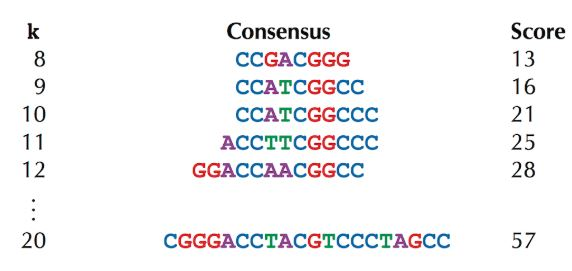




<span style="background-color: orange; color: black;">**Can we infer the DosR binding site from these strings? What do you think is the length of the binding site?**</span>


The conserved region "CGGCCC" is present across all consensus strings. 6 Nucleotides.

The motif of length 20 found by RandomizedMotifSearch() is "CGGGACCTACGTCCCTAGCC" (with score equal to 57). In 2,000 runs, GibbsSampler() generated a different collection of motifs with a smaller score of 55. But these motifs had the same consensus string!

Despite evidence in favor of this consensus string as the DosR motif, we are still not sure that it should have length 20, or even that it is correct, since some other motif finding algorithm might find a set of motifs with even lower score. Can we further refine the algorithms that we have presented to find all putative DosR motifs in MTB as well as all genes that they regulate?

___

##  1.5 Detour: Complications in Motif Finding


Motif finding becomes difficult if the background nucleotide distribution in the sample is skewed. In this case, searching for k-mers with the minimum score or entropy may lead to a biologically irrelevant motif composed from the most frequent nucleotides in the sample. For example, if A has frequency 85% and T, G, and C have frequencies of 5%, then the k-mer "AA...AA" may represent a motif with minimum score, thus disguising biologically relevant motifs. For example, the relevant motif "GCCG" with score 5 in the example below loses out to the motif "aaaa" with score 1


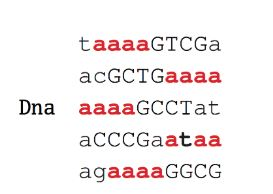

Another complication in motif finding is that many motifs are best represented in a different alphabet than the alphabet of four nucleotides. Let W denote either A or T, S denote either G or C, K denote either G or T, and Y denote either C or T. Now, consider the motif "CSKWYWWATKWATYYK", which represents the CSRE motif in yeast. This strong motif in a hybrid alphabet corresponds to 211 different motifs in the standard four-letter alphabet of nucleotides. However, each of these 211 motifs is too weak to be found by the algorithms we have considered in this chapter.

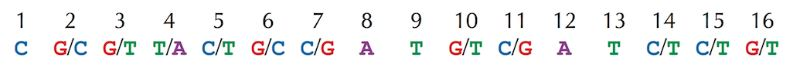

**Gibs Search Process Overview:**

- Randomly select motifs from a set of DNA strings.
- Remove one selected motif and its corresponding sequence.
- Create a Count matrix from the remaining motifs, then construct a Profile matrix.
- Calculate the probabilities of k-mers in the deleted sequence.
- Use these probabilities to roll a die and select a new starting position for the motif.
- Repeat the process until motifs improve or a set number of iterations is reached.